# Lab / Homework

1. Write a function to load fMRI data from a nifti file. It should take a filename and return an array.

2. Write a more general function than `plot_horizontal_slices()` (call it `slice_3d_array`) that can show slices in arbitrary dimensions (depending on a keyword argument). Reproduce these plots for different types of slices (coronal, sagittal).

In [1]:
# Packages we will use
import nibabel
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
# nifti file to test the functions
fname = '/home/shared/cogneuro-connector/data/fmri/categories/sub01_categories1_1.nii.gz'

In [5]:
# Solution 1.
# Write a function to load fMRI data from a nifti file. 
# It should take a filename and return an array
def load_fmri_data(fname):
    """
    Function to load fMRI data from a nifti file.
    """
    nii = nibabel.load(fname)
    data = nii.get_data()
    return data

In [6]:
data = load_fmri_data(fname).T 
first_volume = data[0]
print(data.shape)
print(first_volume.shape)

(120, 30, 100, 100)
(30, 100, 100)


In [7]:
# Solution 2.
# Write a more general function than plot_horizontal_slices() 
# (call it slice_3d_array) that can show slices in arbitrary dimensions 
# (depending on a keyword argument). 
# Reproduce these plots for different types of slices (coronal, sagittal).

def slice_3d_array(vol, axis=0, **kwargs):
    
    """Function to plot slices of a 3D array along a given axis."""
    
    nslices = vol.shape[axis]
    fig = plt.figure(figsize=(10,10))
    subplot_size = np.ceil(np.sqrt(nslices))
    print("{} slices will be visualized".format(nslices))

    for s in range(nslices):
        ax = fig.add_subplot(subplot_size, subplot_size, s+1)
        if axis==0:
            slices = vol[s,:,:]
        elif axis==1:
            slices = vol[:,s,:]
        elif axis==2:
            slices = vol[:,:,s]

        plt.imshow(slices, **kwargs)
        ax.axis('off')

30 slices will be visualized


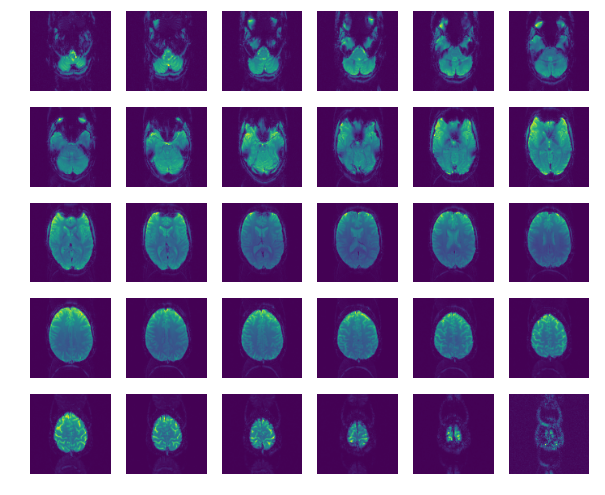

In [8]:
slice_3d_array(first_volume, axis=0, cmap='viridis')

100 slices will be visualized


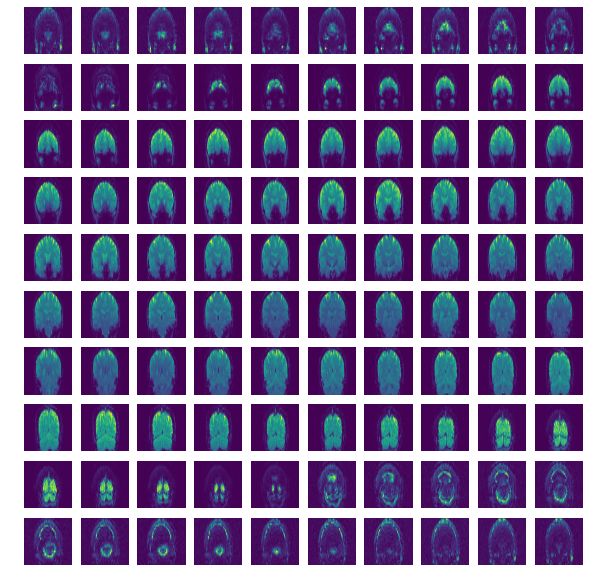

In [9]:
slice_3d_array(first_volume, axis=1, 
               cmap='viridis', aspect='auto', origin='lower')

100 slices will be visualized


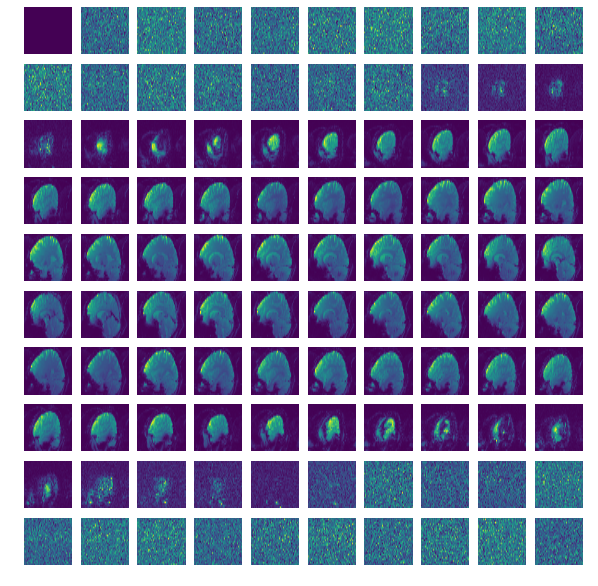

In [10]:
slice_3d_array(first_volume, axis=2,
               cmap='viridis', aspect='auto', origin='lower')